# Results and Plots for BoW Classifier

*Marco Tallone*\
*Scientific and Data-Intensive Computing (SDIC) - UniTS*\
*Computer Vision and Pattern Recognition (CVPR) Exam Project*\
*2024/2025*

The objective of this notebook is to produce the numeric results and the plots needed for the final report of the BoW classifier.\
Please, refer to the `bow-classifier.ipynb` notebook for a detailed description of the code and a step-by-step explanation of the project.

### Imports and Dataset Loading

In [1]:
# import modules and utility functions
from utils import *

# Constants
DATASET_DIR = "../datasets"
TRAIN_DIR = os.path.join(DATASET_DIR, "train")
TEST_DIR = os.path.join(DATASET_DIR, "test")

# Load data
train_images, train_labels, classes = load_images(TRAIN_DIR)
test_images,  test_labels, 	_       = load_images(TEST_DIR)

# Data information
print(f"Number of classes: {len(classes)}")
print(f"Number of training images: {len(train_images)}")
print(f"Number of test images: {len(test_images)}")

Imported libraries:
	- Numpy version: 1.26.4
	- OpenCV version: 4.10.0
	- SciKit-Learn version: 1.5.2
	- SciPy version: 1.14.1

Imported functions:
	- load_images()
	- compute_descriptors()
	- intersection_kernel()
	- normalized_histogram()
	- tfidf()
	- kcb()
	- unc()
	- pla()
	- pyramid_histogram()


Loading images:   0%|          | 0/15 [00:00<?, ?it/s]

Loading images:   0%|          | 0/15 [00:00<?, ?it/s]

Number of classes: 15
Number of training images: 1500
Number of test images: 2985


### Feature Extraction

In [2]:
# Initialize SIFT detector and descriptor
FEATURES = 500
sift = cv2.SIFT_create(FEATURES)
descriptors = {}
train_descriptors = {}

# Feature extraction for train images

# Compute descriptors from detected keypoints
all_descriptors, per_image_descriptors, _ = compute_descriptors(train_images, sift)
descriptors["detected"] = all_descriptors
train_descriptors["detected"] = per_image_descriptors

# Compute descriptors from dense grid of keypoints
all_descriptors, per_image_descriptors, _ = compute_descriptors(train_images, sift, grid=True)
descriptors["grid"] = all_descriptors
train_descriptors["grid"] = per_image_descriptors

# Print number of descriptors
for key, descriptor in descriptors.items():
	print(f"Number of {key} SIFT descriptors: {len(descriptor)}")


# Compute descriptors from detected keypoints


# # Compute descriptors from detected keypoints
# descriptors1 = []
# n_descriptors1 = []
# for image in tqdm.tqdm(
# 	train_images, 
# 	desc="Computing descriptors from detected keypoints", 
# 	leave=False
# ):
# 	_, image_descriptors = sift.detectAndCompute(image, None)
# 	n_descriptors1.append(len(image_descriptors))
# 	descriptors1.extend(image_descriptors)

# descriptors1 = np.array(descriptors1)

# # Compute descriptors from dense grid of keypoints
# descriptors2 = []
# n_descriptors2 = []
# spacing = 8 # pixels
# for image in tqdm.tqdm(
# 	train_images, 
# 	desc="Computing descriptors from grid of keypoints", 
# 	leave=False
# ):
# 	height, width = image.shape[:2]
# 	keypoints = [
# 		cv2.KeyPoint(x, y, spacing) 
# 	 	for y in range(spacing, height, spacing) 
# 	  	for x in range(spacing, width, spacing)
# 	]
# 	_, image_descriptors = sift.compute(image, keypoints)
# 	n_descriptors2.append(len(image_descriptors))
# 	descriptors2.extend(image_descriptors)
	
# descriptors2 = np.array(descriptors2)	

# print(f"Number of detected SIFT descriptors: {len(descriptors1)}")
# print(f"Number of grid SIFT descriptors: {len(descriptors2)}")

Computing descriptors:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing descriptors:   0%|          | 0/1500 [00:00<?, ?it/s]

Number of detected SIFT descriptors: 593006
Number of grid SIFT descriptors: 1482434


### Clustering

In [3]:
# Random subset of descriptors
np.random.seed(3)
n_samples = {
    "detected": 10000,	# for detected keypoints
    "grid": 	25000	# for dense grid of keypoints 
}

sample_indices = {
	key: np.random.choice(len(descriptors[key]), n_samples[key], replace=False)
	for key in descriptors
}

sample_descriptors = {
	key: descriptors[key][sample_indices[key]]
	for key in descriptors
}

# Number of clusters
K = 400

# Clustering
kmeans = {
	key: KMeans(n_clusters=K, random_state=42)
	for key in descriptors
}

for key in descriptors:
	kmeans[key].fit(sample_descriptors[key])

# n_samples1 = 10000
# n_samples2 = 25000
# descriptors1 = descriptors["detected"]
# descriptors2 = descriptors["grid"]

# sample_indices1 = np.random.choice(len(descriptors1), n_samples1, replace=False)
# sample_descriptors1 = descriptors1[sample_indices1]

# sample_indices2 = np.random.choice(len(descriptors2), n_samples2, replace=False)
# sample_descriptors2 = descriptors2[sample_indices2]

# # Number of clusters
# K = 400

# # Clustering
# kmeans1 = KMeans(n_clusters=K, random_state=42)
# kmeans1.fit(sample_descriptors1)

# kmeans2 = KMeans(n_clusters=K, random_state=42)
# kmeans2.fit(sample_descriptors2)

# kmeans = {
# 	"detected": kmeans1,
# 	"grid": kmeans2
# }

### Representations

In [ ]:
# Compute all possible representations for train and test images

# Normalized Histogram representation
train_histograms = {
	"detected": normalized_histogram(train_images, sift, kmeans["detected"]),
	"grid": normalized_histogram(train_images, sift, kmeans["grid"], grid=True)
}
test_histograms = {
	"detected": normalized_histogram(test_images, sift, kmeans["detected"]),
	"grid": normalized_histogram(test_images, sift, kmeans["grid"], grid=True)
}

# TF-IDF representation
train_tfidf = {
	"detected": tfidf(train_images, sift, kmeans["detected"]),
	"grid": tfidf(train_images, sift, kmeans["grid"], grid=True)
}
test_tfidf = {
	"detected": tfidf(test_images, sift, kmeans["detected"]),
	"grid": tfidf(test_images, sift, kmeans["grid"], grid=True)
}

# Kernel codebook representation
train_kcb = {
	"detected": kcb(train_images, sift, kmeans["detected"]),
	"grid": kcb(train_images, sift, kmeans["grid"], grid=True)
}
test_kcb = {
	"detected": kcb(test_images, sift, kmeans["detected"]),
	"grid": kcb(test_images, sift, kmeans["grid"], grid=True)
}

# Codeword uncertainty representation
train_unc = {
	"detected": unc(train_images, sift, kmeans["detected"]),
	"grid": unc(train_images, sift, kmeans["grid"], grid=True)
}
test_unc = {
	"detected": unc(test_images, sift, kmeans["detected"]),
	"grid": unc(test_images, sift, kmeans["grid"], grid=True)
}

# Codeword plausibility representation
train_pla = {
	"detected": pla(train_images, sift, kmeans["detected"]),
	"grid": pla(train_images, sift, kmeans["grid"], grid=True)
}
test_pla = {
	"detected": pla(test_images, sift, kmeans["detected"]),
	"grid": pla(test_images, sift, kmeans["grid"], grid=True)
}

# Spatial pyramid histogram representation
LEVELS = range(0, 3)
train_pyramid = {
	"grid": pyramid_histogram(train_images, sift, kmeans["grid"], levels=LEVELS)
}
test_pyramid = {
	"grid": pyramid_histogram(test_images, sift, kmeans["grid"], levels=LEVELS)
}    


Computing histogram representations:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing histogram representations:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing histogram representations:   0%|          | 0/2985 [00:00<?, ?it/s]

Computing histogram representations:   0%|          | 0/2985 [00:00<?, ?it/s]

Computing TF-IDF representations:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing TF-IDF representations:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing TF-IDF representations:   0%|          | 0/2985 [00:00<?, ?it/s]

Computing TF-IDF representations:   0%|          | 0/2985 [00:00<?, ?it/s]

Computing KCB representations:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing KCB representations:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing KCB representations:   0%|          | 0/2985 [00:00<?, ?it/s]

Computing KCB representations:   0%|          | 0/2985 [00:00<?, ?it/s]

Computing UNC representations:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing UNC representations:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing UNC representations:   0%|          | 0/2985 [00:00<?, ?it/s]

Computing UNC representations:   0%|          | 0/2985 [00:00<?, ?it/s]

Computing PLA representations:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing PLA representations:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing PLA representations:   0%|          | 0/2985 [00:00<?, ?it/s]

Computing PLA representations:   0%|          | 0/2985 [00:00<?, ?it/s]

Computing pyramid histogram representations:   0%|          | 0/1500 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [8]:
# # Save representations using pickle
# import pickle

# with open("train_histograms.pkl", "wb") as f:
# 	pickle.dump(train_histograms, f)

# with open("test_histograms.pkl", "wb") as f:
# 	pickle.dump(test_histograms, f)
 
# with open("train_tfidf.pkl", "wb") as f:
# 	pickle.dump(train_tfidf, f)
 
# with open("test_tfidf.pkl", "wb") as f:
# 	pickle.dump(test_tfidf, f)
 
# with open("train_kcb.pkl", "wb") as f:
# 	pickle.dump(train_kcb, f)
 
# with open("test_kcb.pkl", "wb") as f:
# 	pickle.dump(test_kcb, f)
 
# with open("train_unc.pkl", "wb") as f:
# 	pickle.dump(train_unc, f)
 
# with open("test_unc.pkl", "wb") as f:
# 	pickle.dump(test_unc, f)
 
# with open("train_pla.pkl", "wb") as f:
# 	pickle.dump(train_pla, f)
 
# with open("test_pla.pkl", "wb") as f:
# 	pickle.dump(test_pla, f)

# with open("train_pyramid.pkl", "wb") as f:
# 	pickle.dump(train_pyramid, f)
 
# with open("test_pyramid.pkl", "wb") as f:
# 	pickle.dump(test_pyramid, f)

In [4]:
# Load representations using pickle
import pickle

with open("train_histograms.pkl", "rb") as f:
	train_histograms = pickle.load(f)
 
with open("test_histograms.pkl", "rb") as f:
	test_histograms = pickle.load(f)
 
with open("train_tfidf.pkl", "rb") as f:
	train_tfidf = pickle.load(f)
 
with open("test_tfidf.pkl", "rb") as f:	
	test_tfidf = pickle.load(f)
 
with open("train_kcb.pkl", "rb") as f:
	train_kcb = pickle.load(f)
 
with open("test_kcb.pkl", "rb") as f:
	test_kcb = pickle.load(f)
 
with open("train_unc.pkl", "rb") as f:
	train_unc = pickle.load(f)
 
with open("test_unc.pkl", "rb") as f:
	test_unc = pickle.load(f)
 
with open("train_pla.pkl", "rb") as f:
	train_pla = pickle.load(f)
 
with open("test_pla.pkl", "rb") as f:
	test_pla = pickle.load(f)
 
with open("train_pyramid.pkl", "rb") as f:
	train_pyramid = pickle.load(f)
 
with open("test_pyramid.pkl", "rb") as f:
	test_pyramid = pickle.load(f)

In [16]:
# Kernel codebook representation
train_kcb = {
	"detected": kcb(train_images, sift, kmeans["detected"]),
	"grid": kcb(train_images, sift, kmeans["grid"], grid=True)
}
test_kcb = {
	"detected": kcb(test_images, sift, kmeans["detected"]),
	"grid": kcb(test_images, sift, kmeans["grid"], grid=True)
}

# Codeword uncertainty representation
train_unc = {
	"detected": unc(train_images, sift, kmeans["detected"]),
	"grid": unc(train_images, sift, kmeans["grid"], grid=True)
}
test_unc = {
	"detected": unc(test_images, sift, kmeans["detected"]),
	"grid": unc(test_images, sift, kmeans["grid"], grid=True)
}

Computing KCB representations:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing KCB representations:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing KCB representations:   0%|          | 0/2985 [00:00<?, ?it/s]

Computing KCB representations:   0%|          | 0/2985 [00:00<?, ?it/s]

Computing UNC representations:   0%|          | 0/1500 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [5]:
# Form a list with all representations
names = [
	"Normalized Histogram",
	"TF-IDF",
	"Kernel Codebook",
	"Codeword Uncertainty",
	"Codeword Plausibility",
	# "Spatial Pyramid Histogram"
]

train_representations = [
	train_histograms,
	train_tfidf,
	train_kcb,
	train_unc,
	train_pla,
	# train_pyramid
]

test_representations = [
	test_histograms,
	test_tfidf,
	test_kcb,
	test_unc,
	test_pla,
	# test_pyramid
]

In [4]:
# # Compute histograms representations for train and test images
# train_histograms1 = []
# test_histograms1 = []
# train_histograms2 = []
# test_histograms2 = []

# # Compute histograms for all training and test images
# for image in tqdm.tqdm(
# 	train_images, 
# 	desc="Computing histograms for training images", 
# 	leave=False
# ):
# 	train_histograms1.append(get_histogram(image, sift, kmeans1, K))
# 	train_histograms2.append(get_histogram(image, sift, kmeans2, K))
# train_histograms1 = np.array(train_histograms1)
# train_histograms2 = np.array(train_histograms2)
 
# for image in tqdm.tqdm(
# 	test_images, 
# 	desc="Computing histograms for test images", 
# 	leave=False
# ):
# 	test_histograms1.append(get_histogram(image, sift, kmeans1, K))
# 	test_histograms2.append(get_histogram(image, sift, kmeans2, K))
# test_histograms1 = np.array(test_histograms1)
# test_histograms2 = np.array(test_histograms2)

Computing histograms for training images:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing histograms for test images:   0%|          | 0/2985 [00:00<?, ?it/s]

In [5]:
# # Compute TD-IDF representations for train and test images
# train_tfidf1 = get_tfidf(train_images, sift, kmeans1, K)
# test_tfidf1 = get_tfidf(test_images, sift, kmeans1, K)
# train_tfidf2 = get_tfidf(train_images, sift, kmeans2, K)
# test_tfidf2 = get_tfidf(test_images, sift, kmeans2, K)

Computing TF-IDF:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing TF-IDF:   0%|          | 0/2985 [00:00<?, ?it/s]

Computing TF-IDF:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing TF-IDF:   0%|          | 0/2985 [00:00<?, ?it/s]

In [6]:
# # Set pyramid levels
# LEVELS = range(0, 3)

# # Compute histograms for all training and test images for pyramid matching kernel
# train_histograms_pmk = []
# test_histograms_pmk = []
# for image in tqdm.tqdm(train_images, desc="Computing histograms for training images", leave=False):
# 	train_histograms_pmk.append(get_pyramid_histogram(image, LEVELS, sift, kmeans2, K))
# train_histograms_pmk = np.array(train_histograms_pmk)
 
# for image in tqdm.tqdm(test_images, desc="Computing histograms for test images", leave=False):
# 	test_histograms_pmk.append(get_pyramid_histogram(image, LEVELS, sift, kmeans2, K))
# test_histograms_pmk = np.array(test_histograms_pmk)

Computing histograms for training images:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing histograms for test images:   0%|          | 0/2985 [00:00<?, ?it/s]

### Dummy

In [7]:
# # Dummy classifier
# dummy1 = DummyClassifier(strategy="most_frequent")
# dummy1.fit(test_histograms1, test_labels)
# dummy_predictions1 = dummy1.predict(test_histograms1)
# dummy_score1 = dummy1.score(test_histograms1, test_labels)

# dummy2 = DummyClassifier(strategy="most_frequent")
# dummy2.fit(test_histograms2, test_labels)
# dummy_predictions2 = dummy2.predict(test_histograms2)
# dummy_score2 = dummy2.score(test_histograms2, test_labels)

# dummy3 = DummyClassifier(strategy="most_frequent")
# dummy3.fit(test_tfidf1, test_labels)
# dummy_predictions3 = dummy3.predict(test_tfidf1)
# dummy_score3 = dummy3.score(test_tfidf1, test_labels)

# dummy4 = DummyClassifier(strategy="most_frequent")
# dummy4.fit(test_tfidf2, test_labels)
# dummy_predictions4 = dummy4.predict(test_tfidf2)
# dummy_score4 = dummy4.score(test_tfidf2, test_labels)

# print(f"Dummy accuracy (SIFT - histograms): {dummy_score1 * 100:.2f}%")
# print(f"Dummy accuracy (grid - histograms): {dummy_score2 * 100:.2f}%")
# print(f"Dummy accuracy (SIFT - TF-IDF): {dummy_score3 * 100:.2f}%")
# print(f"Dummy accuracy (grid - TF-IDF): {dummy_score4 * 100:.2f}%")

Dummy accuracy (SIFT - histograms): 10.39%
Dummy accuracy (grid - histograms): 10.39%
Dummy accuracy (SIFT - TF-IDF): 10.39%
Dummy accuracy (grid - TF-IDF): 10.39%


In [15]:
def evaluate_dummy(train, test, labels):
	dummy = DummyClassifier(strategy="most_frequent")
	dummy.fit(test, labels)
	dummy_score = dummy.score(test, labels)
	return dummy_score

# Evaluate dummy classifier
for name, train_rep, test_rep in zip(names, train_representations, test_representations):
	for key in train_rep:
		dummy_score = evaluate_dummy(train_rep[key], test_rep[key], test_labels)
		print(f"Dummy accuracy ({name} - {key}): ".ljust(60), f"{dummy_score * 100:.2f}%")

Dummy accuracy (Normalized Histogram - detected):            10.39%
Dummy accuracy (Normalized Histogram - grid):                10.39%
Dummy accuracy (TF-IDF - detected):                          10.39%
Dummy accuracy (TF-IDF - grid):                              10.39%
Dummy accuracy (Kernel Codebook - detected):                 10.39%
Dummy accuracy (Kernel Codebook - grid):                     10.39%
Dummy accuracy (Codeword Uncertainty - detected):            10.39%
Dummy accuracy (Codeword Uncertainty - grid):                10.39%
Dummy accuracy (Codeword Plausibility - detected):           10.39%
Dummy accuracy (Codeword Plausibility - grid):               10.39%


### KNN

In [ ]:
# # Single neighbors KNN
# one_knn1 = KNeighborsClassifier(n_neighbors=1)
# one_knn1.fit(train_histograms1, train_labels)
# one_knn_predictions1 = one_knn1.predict(test_histograms1)
# one_knn_accuracy1 = accuracy_score(test_labels, one_knn_predictions1)

# one_knn2 = KNeighborsClassifier(n_neighbors=1)
# one_knn2.fit(train_histograms2, train_labels)
# one_knn_predictions2 = one_knn2.predict(test_histograms2)
# one_knn_accuracy2 = accuracy_score(test_labels, one_knn_predictions2)

# one_knn3 = KNeighborsClassifier(n_neighbors=1)
# one_knn3.fit(train_tfidf1, train_labels)
# one_knn_predictions3 = one_knn3.predict(test_tfidf1)
# one_knn_accuracy3 = accuracy_score(test_labels, one_knn_predictions3)

# one_knn4 = KNeighborsClassifier(n_neighbors=1)
# one_knn4.fit(train_tfidf2, train_labels)
# one_knn_predictions4 = one_knn4.predict(test_tfidf2)
# one_knn_accuracy4 = accuracy_score(test_labels, one_knn_predictions4)

# print(f"1-NN accuracy (SIFT - histograms): {one_knn_accuracy1 * 100:.2f}%")
# print(f"1-NN accuracy (grid - histograms): {one_knn_accuracy2 * 100:.2f}%")
# print(f"1-NN accuracy (SIFT - TF-IDF): {one_knn_accuracy3 * 100:.2f}%")
# print(f"1-NN accuracy (grid - TF-IDF): {one_knn_accuracy4 * 100:.2f}%")

# # Multi neighbors KNN (find best k and assess performance)
# k_values = range(1, 51)
# accuracies1 = []
# accuracies2 = []
# accuracies3 = []
# accuracies4 = []
# for k_ in tqdm.tqdm(k_values, desc="Testing k-NN values", leave=False):

# 	# Train k-NN classifier
# 	knn1 = KNeighborsClassifier(n_neighbors=k_)
# 	knn1.fit(train_histograms1, train_labels)
# 	knn2 = KNeighborsClassifier(n_neighbors=k_)
# 	knn2.fit(train_histograms2, train_labels)
# 	knn3 = KNeighborsClassifier(n_neighbors=k_)
# 	knn3.fit(train_tfidf1, train_labels)
# 	knn4 = KNeighborsClassifier(n_neighbors=k_)
# 	knn4.fit(train_tfidf2, train_labels)

# 	# Predict labels for test set
# 	predictions1 = knn1.predict(test_histograms1)
# 	predictions2 = knn2.predict(test_histograms2)
# 	predictions3 = knn3.predict(test_tfidf1)
# 	predictions4 = knn4.predict(test_tfidf2)

# 	# Calculate accuracy
# 	accuracy1 = accuracy_score(test_labels, predictions1)
# 	accuracy2 = accuracy_score(test_labels, predictions2)
# 	accuracy3 = accuracy_score(test_labels, predictions3)
# 	accuracy4 = accuracy_score(test_labels, predictions4)
 
# 	accuracies1.append(accuracy1)
# 	accuracies2.append(accuracy2)
# 	accuracies3.append(accuracy3)
# 	accuracies4.append(accuracy4)

# # Best k
# best_k1 = k_values[np.argmax(accuracies1)]
# knn1 = KNeighborsClassifier(n_neighbors=best_k1)
# knn1.fit(train_histograms1, train_labels)
# predictions1 = knn1.predict(test_histograms1)
# accuracy1 = accuracy_score(test_labels, predictions1)

# best_k2 = k_values[np.argmax(accuracies2)]
# knn2 = KNeighborsClassifier(n_neighbors=best_k2)
# knn2.fit(train_histograms2, train_labels)
# predictions2 = knn2.predict(test_histograms2)
# accuracy2 = accuracy_score(test_labels, predictions2)

# best_k3 = k_values[np.argmax(accuracies3)]
# knn3 = KNeighborsClassifier(n_neighbors=best_k3)
# knn3.fit(train_tfidf1, train_labels)
# predictions3 = knn3.predict(test_tfidf1)
# accuracy3 = accuracy_score(test_labels, predictions3)

# best_k4 = k_values[np.argmax(accuracies4)]
# knn4 = KNeighborsClassifier(n_neighbors=best_k4)
# knn4.fit(train_tfidf2, train_labels)
# predictions4 = knn4.predict(test_tfidf2)
# accuracy4 = accuracy_score(test_labels, predictions4)

# print(f"k-NN accuracy (SIFT - histograms): {accuracy1 * 100:.2f}% with k={best_k1}")
# print(f"k-NN accuracy (grid - histograms): {accuracy2 * 100:.2f}% with k={best_k2}")
# print(f"k-NN accuracy (SIFT - TF-IDF): {accuracy3 * 100:.2f}% with k={best_k3}")
# print(f"k-NN accuracy (grid - TF-IDF): {accuracy4 * 100:.2f}% with k={best_k4}")

1-NN accuracy (SIFT - histograms): 31.49%
1-NN accuracy (grid - histograms): 32.36%
1-NN accuracy (SIFT - TF-IDF): 31.83%
1-NN accuracy (grid - TF-IDF): 23.48%


Testing k-NN values:   0%|          | 0/50 [00:00<?, ?it/s]

k-NN accuracy (SIFT - histograms): 37.19% with k=13
k-NN accuracy (grid - histograms): 38.76% with k=20
k-NN accuracy (SIFT - TF-IDF): 36.42% with k=14
k-NN accuracy (grid - TF-IDF): 28.31% with k=11


In [7]:
def evaluate_1nn(train, test, train_labels, test_labels):
	knn = KNeighborsClassifier(n_neighbors=1)
	knn.fit(train, train_labels)
	predictions = knn.predict(test)
	accuracy = accuracy_score(test_labels, predictions)
	return accuracy

def evaluate_knn(train, test, train_labels, test_labels, k_values):
	accuracies = []
	for k_ in k_values:
		knn = KNeighborsClassifier(n_neighbors=k_)
		knn.fit(train, train_labels)
		predictions = knn.predict(test)
		accuracy = accuracy_score(test_labels, predictions)
		accuracies.append(accuracy)
	best_k = k_values[np.argmax(accuracies)]
	knn = KNeighborsClassifier(n_neighbors=best_k)
	knn.fit(train, train_labels)
	predictions = knn.predict(test)
	accuracy = accuracy_score(test_labels, predictions)
	return accuracy, best_k

# Evaluate 1-NN
for name, train_rep, test_rep in zip(names, train_representations, test_representations):
	for key in train_rep:
		accuracy = evaluate_1nn(train_rep[key], test_rep[key], train_labels, test_labels)
		print(f"1-NN accuracy ({name} - {key}): ".ljust(60), f"{accuracy * 100:.2f}%")
  
# Evaluate k-NN
k_values = range(1, 51)
for name, train_rep, test_rep in zip(names, train_representations, test_representations):
	for key in train_rep:
		accuracy, best_k = evaluate_knn(train_rep[key], test_rep[key], train_labels, test_labels, k_values)
		print(f"k-NN accuracy ({name} - {key}): ".ljust(60), f"{accuracy * 100:.2f}% with k={best_k}")

1-NN accuracy (Normalized Histogram - detected):             31.49%
1-NN accuracy (Normalized Histogram - grid):                 43.75%
1-NN accuracy (TF-IDF - detected):                           31.83%
1-NN accuracy (TF-IDF - grid):                               39.30%
1-NN accuracy (Kernel Codebook - detected):                  34.81%
1-NN accuracy (Kernel Codebook - grid):                      42.08%
1-NN accuracy (Codeword Uncertainty - detected):             31.36%
1-NN accuracy (Codeword Uncertainty - grid):                 43.79%
1-NN accuracy (Codeword Plausibility - detected):            37.62%
1-NN accuracy (Codeword Plausibility - grid):                49.75%
1-NN accuracy (Spatial Pyramid Histogram - grid):            39.03%
k-NN accuracy (Normalized Histogram - detected):             37.19% with k=13
k-NN accuracy (Normalized Histogram - grid):                 43.95% with k=5
k-NN accuracy (TF-IDF - detected):                           36.42% with k=14
k-NN accuracy (TF-I

### SVM

In [39]:
# # Precompute Gram matrices
# train_gram = {
#     "histogram" : {
# 		"chi2": {
# 			"detected": chi2_kernel(train_histograms["detected"], train_histograms["detected"]),
# 			"grid": chi2_kernel(train_histograms["grid"], train_histograms["grid"])
# 		},
# 		"intersection": {
# 			"detected": intersection_kernel(train_histograms["detected"], train_histograms["detected"]),
# 			"grid": intersection_kernel(train_histograms["grid"], train_histograms["grid"])
# 		}
# 	},
# 	"tfidf": {
# 		"chi2": {
# 			"detected": chi2_kernel(train_tfidf["detected"], train_tfidf["detected"]),
# 			"grid": chi2_kernel(train_tfidf["grid"], train_tfidf["grid"])
# 		},
# 		"intersection": {
# 			"detected": intersection_kernel(train_tfidf["detected"], train_tfidf["detected"]),
# 			"grid": intersection_kernel(train_tfidf["grid"], train_tfidf["grid"])
# 		}
# 	},
# 	"kcb": {
# 		"chi2": {
# 			"detected": chi2_kernel(train_kcb["detected"], train_kcb["detected"]),
# 			"grid": chi2_kernel(train_kcb["grid"], train_kcb["grid"])
# 		},
# 		"intersection": {
# 			"detected": intersection_kernel(train_kcb["detected"], train_kcb["detected"]),
# 			"grid": intersection_kernel(train_kcb["grid"], train_kcb["grid"])
# 		}
# 	},
# 	"unc": {
# 		"chi2": {
# 			"detected": chi2_kernel(train_unc["detected"], train_unc["detected"]),
# 			"grid": chi2_kernel(train_unc["grid"], train_unc["grid"])
# 		},
# 		"intersection": {
# 			"detected": intersection_kernel(train_unc["detected"], train_unc["detected"]),
# 			"grid": intersection_kernel(train_unc["grid"], train_unc["grid"])
# 		}
# 	},
# 	"pla": {
# 		"chi2": {
# 			"detected": chi2_kernel(train_pla["detected"], train_pla["detected"]),
# 			"grid": chi2_kernel(train_pla["grid"], train_pla["grid"])
# 		},
# 		"intersection": {
# 			"detected": intersection_kernel(train_pla["detected"], train_pla["detected"]),
# 			"grid": intersection_kernel(train_pla["grid"], train_pla["grid"])
# 		}
# 	},
# 	"pyramid": {
# 		"intersection": {
# 			"grid": intersection_kernel(train_pyramid["grid"], train_pyramid["grid"])
# 		}
# 	}
# }

# test_gram = {
#     "histogram" : {
# 		"chi2": {
# 			"detected": chi2_kernel(test_histograms["detected"], train_histograms["detected"]),
# 			"grid": chi2_kernel(test_histograms["grid"], train_histograms["grid"])
# 		},
# 		"intersection": {
# 			"detected": intersection_kernel(test_histograms["detected"], train_histograms["detected"]),
# 			"grid": intersection_kernel(test_histograms["grid"], train_histograms["grid"])
# 		}
# 	},
# 	"tfidf": {
# 		"chi2": {
# 			"detected": chi2_kernel(test_tfidf["detected"], train_tfidf["detected"]),
# 			"grid": chi2_kernel(test_tfidf["grid"], train_tfidf["grid"])
# 		},
# 		"intersection": {
# 			"detected": intersection_kernel(test_tfidf["detected"], train_tfidf["detected"]),
# 			"grid": intersection_kernel(test_tfidf["grid"], train_tfidf["grid"])
# 		}
# 	},
# 	"kcb": {
# 		"chi2": {
# 			"detected": chi2_kernel(test_kcb["detected"], train_kcb["detected"]),
# 			"grid": chi2_kernel(test_kcb["grid"], train_kcb["grid"])
# 		},
# 		"intersection": {
# 			"detected": intersection_kernel(test_kcb["detected"], train_kcb["detected"]),
# 			"grid": intersection_kernel(test_kcb["grid"], train_kcb["grid"])
# 		}
# 	},
# 	"unc": {
# 		"chi2": {
# 			"detected": chi2_kernel(test_unc["detected"], train_unc["detected"]),
# 			"grid": chi2_kernel(test_unc["grid"], train_unc["grid"])
# 		},
# 		"intersection": {
# 			"detected": intersection_kernel(test_unc["detected"], train_unc["detected"]),
# 			"grid": intersection_kernel(test_unc["grid"], train_unc["grid"])
# 		}
# 	},
# 	"pla": {
# 		"chi2": {
# 			"detected": chi2_kernel(test_pla["detected"], train_pla["detected"]),
# 			"grid": chi2_kernel(test_pla["grid"], train_pla["grid"])
# 		},
# 		"intersection": {
# 			"detected": intersection_kernel(test_pla["detected"], train_pla["detected"]),
# 			"grid": intersection_kernel(test_pla["grid"], train_pla["grid"])
# 		}
# 	},
# 	"pyramid": {
# 		"intersection": {
# 			"grid": intersection_kernel(test_pyramid["grid"], train_pyramid["grid"])
# 		}
# 	}
# }

# # Save Gram matrices using pickle
# import pickle

# with open("train_gram.pkl", "wb") as f:
# 	pickle.dump(train_gram, f)
 
# with open("test_gram.pkl", "wb") as f:
# 	pickle.dump(test_gram, f)

Computing kernel:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing kernel:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing kernel:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing kernel:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing kernel:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing kernel:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing kernel:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing kernel:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing kernel:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing kernel:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing kernel:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing kernel:   0%|          | 0/2985 [00:00<?, ?it/s]

: 

In [ ]:
# # SVMs classifiers
# rbf_SVMs1 = []
# rbf_SVMs2 = []
# rbf_SVMs3 = []
# rbf_SVMs4 = []

# chi_SVMs1 = []
# chi_SVMs2 = []
# chi_SVMs3 = []
# chi_SVMs4 = []

# pmk_SVMs = []

# # Precompute Gram matrix for training and testing
# chi_train_gram1 = chi2_kernel(train_histograms1, train_histograms1, gamma=0.5)
# chi_test_gram1 = chi2_kernel(test_histograms1, train_histograms1, gamma=0.5)
# chi_train_gram2 = chi2_kernel(train_histograms2, train_histograms2, gamma=0.5)
# chi_test_gram2 = chi2_kernel(test_histograms2, train_histograms2, gamma=0.5)
# chi_train_gram3 = chi2_kernel(train_tfidf1, train_tfidf1, gamma=0.5)
# chi_test_gram3 = chi2_kernel(test_tfidf1, train_tfidf1, gamma=0.5)
# chi_train_gram4 = chi2_kernel(train_tfidf2, train_tfidf2, gamma=0.5)
# chi_test_gram4 = chi2_kernel(test_tfidf2, train_tfidf2, gamma=0.5)

# pmk_train_gram = pyramid_kernel(train_histograms_pmk, train_histograms_pmk)
# pmk_test_gram = pyramid_kernel(test_histograms_pmk, train_histograms_pmk)

# for target_label in tqdm.tqdm(set(train_labels), desc="Training SVMs", leave=False):

# 	# Change labels to {1, -1}
# 	one_vs_all_labels = [1 if label == target_label else -1 for label in train_labels]
	
# 	# SVM with RBF kernel
# 	svm1 = SVC(probability=True, C=1.0, kernel='rbf')
# 	svm1.fit(train_histograms1, one_vs_all_labels)
# 	rbf_SVMs1.append(svm1)
# 	svm2 = SVC(probability=True, C=1.0, kernel='rbf')
# 	svm2.fit(train_histograms2, one_vs_all_labels)
# 	rbf_SVMs2.append(svm2)
# 	svm3 = SVC(probability=True, C=1.0, kernel='rbf')
# 	svm3.fit(train_tfidf1, one_vs_all_labels)
# 	rbf_SVMs3.append(svm3)
# 	svm4 = SVC(probability=True, C=1.0, kernel='rbf')
# 	svm4.fit(train_tfidf2, one_vs_all_labels)
# 	rbf_SVMs4.append(svm4)

# 	# SVM with chi2 kernel
# 	svm1 = SVC(probability=True, C=1.0, kernel='precomputed')
# 	svm1.fit(chi_train_gram1, one_vs_all_labels)
# 	chi_SVMs1.append(svm1)
# 	svm2 = SVC(probability=True, C=1.0, kernel='precomputed')
# 	svm2.fit(chi_train_gram2, one_vs_all_labels)
# 	chi_SVMs2.append(svm2)
# 	svm3 = SVC(probability=True, C=1.0, kernel='precomputed')
# 	svm3.fit(chi_train_gram3, one_vs_all_labels)
# 	chi_SVMs3.append(svm3)
# 	svm4 = SVC(probability=True, C=1.0, kernel='precomputed')
# 	svm4.fit(chi_train_gram4, one_vs_all_labels)
# 	chi_SVMs4.append(svm4)

# 	# SVM with pyramid matching kernel
# 	svm = SVC(probability=True, C=1.0, kernel='precomputed')
# 	svm.fit(pmk_train_gram, one_vs_all_labels)
# 	pmk_SVMs.append(svm)
	
# # Predictions
# predictions = np.array([svm.decision_function(test_histograms1) for svm in rbf_SVMs1])
# rbf_predictions1 = np.argmax(predictions, axis=0)
# predictions = np.array([svm.decision_function(test_histograms2) for svm in rbf_SVMs2])
# rbf_predictions2 = np.argmax(predictions, axis=0)
# predictions = np.array([svm.decision_function(test_tfidf1) for svm in rbf_SVMs3])
# rbf_predictions3 = np.argmax(predictions, axis=0)
# predictions = np.array([svm.decision_function(test_tfidf2) for svm in rbf_SVMs4])
# rbf_predictions4 = np.argmax(predictions, axis=0)

# predictions = np.array([svm.decision_function(chi_test_gram1) for svm in chi_SVMs1])
# chi_predictions1 = np.argmax(predictions, axis=0)
# predictions = np.array([svm.decision_function(chi_test_gram2) for svm in chi_SVMs2])
# chi_predictions2 = np.argmax(predictions, axis=0)
# predictions = np.array([svm.decision_function(chi_test_gram3) for svm in chi_SVMs3])
# chi_predictions3 = np.argmax(predictions, axis=0)
# predictions = np.array([svm.decision_function(chi_test_gram4) for svm in chi_SVMs4])
# chi_predictions4 = np.argmax(predictions, axis=0)

# predictions = np.array([svm.decision_function(pmk_test_gram) for svm in pmk_SVMs])
# pmk_predictions = np.argmax(predictions, axis=0)

# # Accuracies
# rbf_accuracy1 = accuracy_score(test_labels, rbf_predictions1)
# rbf_accuracy2 = accuracy_score(test_labels, rbf_predictions2)
# rbf_accuracy3 = accuracy_score(test_labels, rbf_predictions3)
# rbf_accuracy4 = accuracy_score(test_labels, rbf_predictions4)

# chi_accuracy1 = accuracy_score(test_labels, chi_predictions1)
# chi_accuracy2 = accuracy_score(test_labels, chi_predictions2)
# chi_accuracy3 = accuracy_score(test_labels, chi_predictions3)
# chi_accuracy4 = accuracy_score(test_labels, chi_predictions4)

# pmk_accuracy = accuracy_score(test_labels, pmk_predictions)

# print(f"SVM accuracy (RBF - SIFT - histograms): {rbf_accuracy1 * 100:.2f}%")
# print(f"SVM accuracy (RBF - grid - histograms): {rbf_accuracy2 * 100:.2f}%")
# print(f"SVM accuracy (RBF - SIFT - TF-IDF): {rbf_accuracy3 * 100:.2f}%")
# print(f"SVM accuracy (RBF - grid - TF-IDF): {rbf_accuracy4 * 100:.2f}%")

# print(f"SVM accuracy (chi2 - SIFT - histograms): {chi_accuracy1 * 100:.2f}%")
# print(f"SVM accuracy (chi2 - grid - histograms): {chi_accuracy2 * 100:.2f}%")
# print(f"SVM accuracy (chi2 - SIFT - TF-IDF): {chi_accuracy3 * 100:.2f}%")
# print(f"SVM accuracy (chi2 - grid - TF-IDF): {chi_accuracy4 * 100:.2f}%")

# print(f"SVM accuracy (pyramid matching kernel): {pmk_accuracy * 100:.2f}%")

Computing kernel:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing kernel:   0%|          | 0/2985 [00:00<?, ?it/s]

Training SVMs:   0%|          | 0/15 [00:00<?, ?it/s]

SVM accuracy (RBF - SIFT - histograms): 50.65%
SVM accuracy (RBF - grid - histograms): 50.08%
SVM accuracy (RBF - SIFT - TF-IDF): 50.89%
SVM accuracy (RBF - grid - TF-IDF): 42.01%
SVM accuracy (chi2 - SIFT - histograms): 51.49%
SVM accuracy (chi2 - grid - histograms): 50.12%
SVM accuracy (chi2 - SIFT - TF-IDF): 50.95%
SVM accuracy (chi2 - grid - TF-IDF): 42.81%
SVM accuracy (pyramid matching kernel): 75.54%


In [21]:
# SVM with RBF kernel
def evaluate_svm_rbf(train, test, train_labels, test_labels):
	svms = []
	for target_label in set(train_labels):
		one_vs_all_labels = [1 if label == target_label else -1 for label in train_labels]
		svm = SVC(probability=True, C=1.0, kernel='rbf')
		svm.fit(train, one_vs_all_labels)
		svms.append(svm)
	predictions = np.array([svm.decision_function(test) for svm in svms])
	predictions = np.argmax(predictions, axis=0)
	accuracy = accuracy_score(test_labels, predictions)
	return accuracy

for name, train_rep, test_rep in zip(names, train_representations, test_representations):
	for key in train_rep:
		accuracy = evaluate_svm_rbf(train_rep[key], test_rep[key], train_labels, test_labels)
		print(f"SVM accuracy (RBF - {name} - {key}): ".ljust(60), f"{accuracy * 100:.2f}%")

SVM accuracy (RBF - Normalized Histogram - detected):        50.65%
SVM accuracy (RBF - Normalized Histogram - grid):            66.43%
SVM accuracy (RBF - TF-IDF - detected):                      50.89%
SVM accuracy (RBF - TF-IDF - grid):                          62.65%
SVM accuracy (RBF - Kernel Codebook - detected):             52.16%
SVM accuracy (RBF - Kernel Codebook - grid):                 58.79%
SVM accuracy (RBF - Codeword Uncertainty - detected):        52.29%
SVM accuracy (RBF - Codeword Uncertainty - grid):            59.46%
SVM accuracy (RBF - Codeword Plausibility - detected):       46.47%
SVM accuracy (RBF - Codeword Plausibility - grid):           67.00%


In [ ]:
# SVM with chi2 kernel

# Precompute Gram matrix for training and testing
# train_gram = {}
# for i, name in enumerate(names):
# 	train_gram[name] = {}
# 	for key in train_representations[i]:
# 		train_gram[name][key] = chi2_kernel(train_representations[i][key], train_representations[i][key], gamma=0.5)
  
# test_gram = {}
# for i, name in enumerate(names):
# 	test_gram[name] = {}
# 	for key in test_representations[i]:
# 		test_gram[name][key] = chi2_kernel(test_representations[i][key], train_representations[i][key], gamma=0.5)
  
def evaluate_svm_gram(train_gram, test_gram, train_labels, test_labels):
	svms = []
	for target_label in set(train_labels):
		one_vs_all_labels = [1 if label == target_label else -1 for label in train_labels]
		svm = SVC(probability=True, C=1.0, kernel='precomputed')
		svm.fit(train_gram, one_vs_all_labels)
		svms.append(svm)
	predictions = np.array([svm.decision_function(test_gram) for svm in svms])
	predictions = np.argmax(predictions, axis=0)
	accuracy = accuracy_score(test_labels, predictions)
	return accuracy

# for name in names:
# 	accuracy = evaluate_svm_chi(train_gram[name]["detected"], test_gram[name]["detected"], train_labels, test_labels)
# 	print(f"SVM accuracy (chi2 - {name} - detected): ".ljust(60), f"{accuracy * 100:.2f}%")
# 	accuracy = evaluate_svm_chi(train_gram[name]["grid"], test_gram[name]["grid"], train_labels, test_labels)
# 	print(f"SVM accuracy (chi2 - {name} - grid): ".ljust(60), f"{accuracy * 100:.2f}%")

for name, train_rep, test_rep in zip(names, train_representations, test_representations):
	for key in train_rep:
		train_gram = chi2_kernel(train_rep[key], train_rep[key], gamma=0.5)
		test_gram = chi2_kernel(test_rep[key], train_rep[key], gamma=0.5)
		accuracy = evaluate_svm_gram(train_gram, test_gram, train_labels, test_labels)
		print(f"SVM accuracy (chi2 - {name} - {key}): ".ljust(60), f"{accuracy * 100:.2f}%")

SVM accuracy (chi2 - Normalized Histogram - detected):       51.46%
SVM accuracy (chi2 - Normalized Histogram - grid):           69.75%
SVM accuracy (chi2 - TF-IDF - detected):                     50.89%
SVM accuracy (chi2 - TF-IDF - grid):                         68.24%
SVM accuracy (chi2 - Kernel Codebook - detected):            34.34%
SVM accuracy (chi2 - Kernel Codebook - grid):                53.57%
SVM accuracy (chi2 - Codeword Uncertainty - detected):       49.35%
SVM accuracy (chi2 - Codeword Uncertainty - grid):           55.41%
SVM accuracy (chi2 - Codeword Plausibility - detected):      15.44%
SVM accuracy (chi2 - Codeword Plausibility - grid):          42.58%


In [ ]:
# SVM with intersection kernel
def evaluate_svm_gram(train_gram, test_gram, train_labels, test_labels):
	svms = []
	for target_label in set(train_labels):
		one_vs_all_labels = [1 if label == target_label else -1 for label in train_labels]
		svm = SVC(probability=True, C=1.0, kernel='precomputed')
		svm.fit(train_gram, one_vs_all_labels)
		svms.append(svm)
	predictions = np.array([svm.decision_function(test_gram) for svm in svms])
	predictions = np.argmax(predictions, axis=0)
	accuracy = accuracy_score(test_labels, predictions)
	return accuracy

for name, train_rep, test_rep in zip(names, train_representations, test_representations):
	for key in train_rep:
		train_gram = intersection_kernel(train_rep[key], train_rep[key])
		test_gram = intersection_kernel(test_rep[key], train_rep[key])
		accuracy = evaluate_svm_gram(train_gram, test_gram, train_labels, test_labels)
		print(f"SVM accuracy (intersection - {name} - {key}): ".ljust(70), f"{accuracy * 100:.2f}%")


Computing kernel:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing kernel:   0%|          | 0/2985 [00:00<?, ?it/s]

SVM accuracy (intersection - Normalized Histogram - detected):  50.95%


Computing kernel:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing kernel:   0%|          | 0/2985 [00:00<?, ?it/s]

SVM accuracy (intersection - Normalized Histogram - grid):   70.62%


Computing kernel:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing kernel:   0%|          | 0/2985 [00:00<?, ?it/s]

SVM accuracy (intersection - TF-IDF - detected):             50.79%


Computing kernel:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing kernel:   0%|          | 0/2985 [00:00<?, ?it/s]

SVM accuracy (intersection - TF-IDF - grid):                 68.91%


Computing kernel:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing kernel:   0%|          | 0/2985 [00:00<?, ?it/s]

SVM accuracy (intersection - Kernel Codebook - detected):    47.20%


Computing kernel:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing kernel:   0%|          | 0/2985 [00:00<?, ?it/s]

SVM accuracy (intersection - Kernel Codebook - grid):        53.20%


Computing kernel:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing kernel:   0%|          | 0/2985 [00:00<?, ?it/s]

SVM accuracy (intersection - Codeword Uncertainty - detected):  46.97%


Computing kernel:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing kernel:   0%|          | 0/2985 [00:00<?, ?it/s]

SVM accuracy (intersection - Codeword Uncertainty - grid):   56.95%


Computing kernel:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing kernel:   0%|          | 0/2985 [00:00<?, ?it/s]

SVM accuracy (intersection - Codeword Plausibility - detected):  22.95%


Computing kernel:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing kernel:   0%|          | 0/2985 [00:00<?, ?it/s]

SVM accuracy (intersection - Codeword Plausibility - grid):  48.58%


In [14]:
# SVM with pyramid matching kernel

# Precompute Gram matrix for training and testing
train_gram = intersection_kernel(train_pyramid["grid"], train_pyramid["grid"])
test_gram = intersection_kernel(test_pyramid["grid"], train_pyramid["grid"])

svms = []
for target_label in set(train_labels):
	one_vs_all_labels = [1 if label == target_label else -1 for label in train_labels]
	svm = SVC(probability=True, C=1.0, kernel='precomputed')
	svm.fit(train_gram, one_vs_all_labels)
	svms.append(svm)
 
predictions = np.array([svm.decision_function(test_gram) for svm in svms])
predictions = np.argmax(predictions, axis=0)
accuracy = accuracy_score(test_labels, predictions)

print(f"SVM accuracy (pyramid matching kernel): {accuracy * 100:.2f}%")

Computing kernel:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing kernel:   0%|          | 0/2985 [00:00<?, ?it/s]

SVM accuracy (pyramid matching kernel): 75.54%


In [7]:
# SVM with pyramid matching kernel and kernel codebook
LEVELS = range(0, 3)
train_pyramid_kcb = pyramid_kcb(train_images, sift, kmeans["grid"], levels=LEVELS)
test_pyramid_kcb = pyramid_kcb(test_images, sift, kmeans["grid"], levels=LEVELS)

# Precompute Gram matrix for training and testing
train_gram = intersection_kernel(train_pyramid_kcb, train_pyramid_kcb)
test_gram = intersection_kernel(test_pyramid_kcb, train_pyramid_kcb)

svms = []
for target_label in set(train_labels):
	one_vs_all_labels = [1 if label == target_label else -1 for label in train_labels]
	svm = SVC(probability=True, C=1.0, kernel='precomputed')
	svm.fit(train_gram, one_vs_all_labels)
	svms.append(svm)
 
predictions = np.array([svm.decision_function(test_gram) for svm in svms])
predictions = np.argmax(predictions, axis=0)
accuracy = accuracy_score(test_labels, predictions)

print(f"SVM accuracy (pyramid matching kernel codebook): {accuracy * 100:.2f}%")

Computing pyramid histogram representations:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing pyramid histogram representations:   0%|          | 0/2985 [00:00<?, ?it/s]

SVM accuracy (pyramid matching kernel codebook): 60.94%


### Final Results

In [10]:
print(f"Dummy accuracy (SIFT - histograms):\t{dummy_score1 * 100:.2f}%")
print(f"Dummy accuracy (grid - histograms):\t{dummy_score2 * 100:.2f}%")
print(f"Dummy accuracy (SIFT - TF-IDF):\t\t{dummy_score3 * 100:.2f}%")
print(f"Dummy accuracy (grid - TF-IDF):\t\t{dummy_score4 * 100:.2f}%")
print(f"1-NN accuracy (SIFT - histograms):\t{one_knn_accuracy1 * 100:.2f}%")
print(f"1-NN accuracy (grid - histograms):\t{one_knn_accuracy2 * 100:.2f}%")
print(f"1-NN accuracy (SIFT - TF-IDF):\t\t{one_knn_accuracy3 * 100:.2f}%")
print(f"1-NN accuracy (grid - TF-IDF):\t\t{one_knn_accuracy4 * 100:.2f}%")
print(f"k-NN accuracy (SIFT - histograms):\t{accuracy1 * 100:.2f}% with k={best_k1}")
print(f"k-NN accuracy (grid - histograms):\t{accuracy2 * 100:.2f}% with k={best_k2}")
print(f"k-NN accuracy (SIFT - TF-IDF):\t\t{accuracy3 * 100:.2f}% with k={best_k3}")
print(f"k-NN accuracy (grid - TF-IDF):\t\t{accuracy4 * 100:.2f}% with k={best_k4}")
print(f"SVM accuracy (RBF - SIFT - histograms):\t{rbf_accuracy1 * 100:.2f}%")
print(f"SVM accuracy (RBF - grid - histograms):\t{rbf_accuracy2 * 100:.2f}%")
print(f"SVM accuracy (RBF - SIFT - TF-IDF):\t{rbf_accuracy3 * 100:.2f}%")
print(f"SVM accuracy (RBF - grid - TF-IDF):\t{rbf_accuracy4 * 100:.2f}%")
print(f"SVM accuracy (chi2 - SIFT - histograms):{chi_accuracy1 * 100:.2f}%")
print(f"SVM accuracy (chi2 - grid - histograms):{chi_accuracy2 * 100:.2f}%")
print(f"SVM accuracy (chi2 - SIFT - TF-IDF):\t{chi_accuracy3 * 100:.2f}%")
print(f"SVM accuracy (chi2 - grid - TF-IDF):\t{chi_accuracy4 * 100:.2f}%")
print(f"SVM accuracy (pyramid matching kernel):\t{pmk_accuracy * 100:.2f}%")

Dummy accuracy (SIFT - histograms):	10.39%
Dummy accuracy (grid - histograms):	10.39%
Dummy accuracy (SIFT - TF-IDF):		10.39%
Dummy accuracy (grid - TF-IDF):		10.39%
1-NN accuracy (SIFT - histograms):	31.49%
1-NN accuracy (grid - histograms):	32.36%
1-NN accuracy (SIFT - TF-IDF):		31.83%
1-NN accuracy (grid - TF-IDF):		23.48%
k-NN accuracy (SIFT - histograms):	37.19% with k=13
k-NN accuracy (grid - histograms):	38.76% with k=20
k-NN accuracy (SIFT - TF-IDF):		36.42% with k=14
k-NN accuracy (grid - TF-IDF):		28.31% with k=11
SVM accuracy (RBF - SIFT - histograms):	50.65%
SVM accuracy (RBF - grid - histograms):	50.08%
SVM accuracy (RBF - SIFT - TF-IDF):	50.89%
SVM accuracy (RBF - grid - TF-IDF):	42.01%
SVM accuracy (chi2 - SIFT - histograms):51.49%
SVM accuracy (chi2 - grid - histograms):50.12%
SVM accuracy (chi2 - SIFT - TF-IDF):	50.95%
SVM accuracy (chi2 - grid - TF-IDF):	42.81%
SVM accuracy (pyramid matching kernel):	75.54%


## Plots

Plots for the final report

In [11]:
IMAGE_DIR = "../report/images"

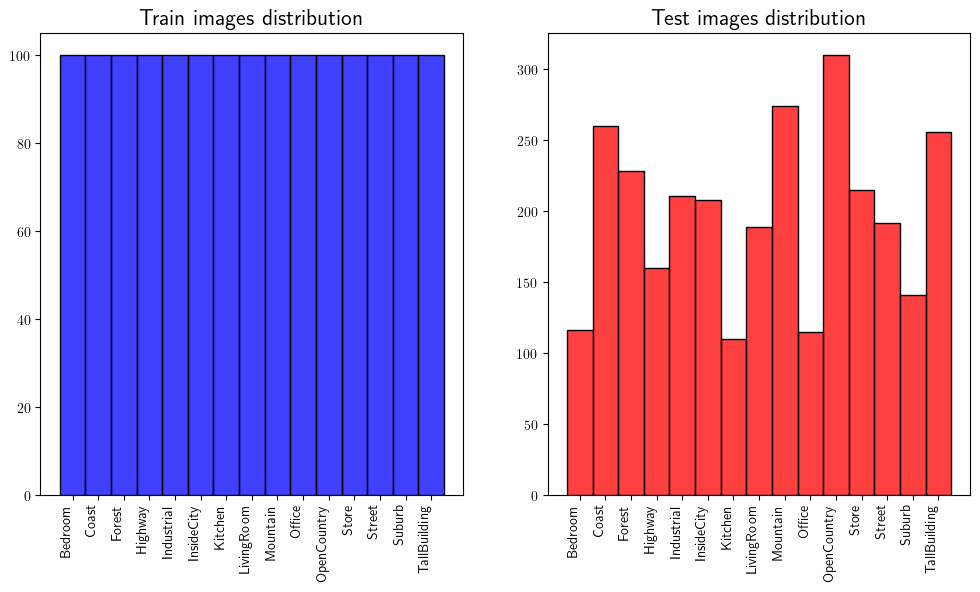

In [12]:
# Classes distribution plot
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(train_labels, bins=len(classes), ax=ax[0], color="blue", binrange=[0, len(classes)], binwidth=1)
ax[0].set_title("Train images distribution", fontsize=16)
ax[0].set_xticks([i + 0.5 for i in range(len(classes))])
ax[0].set_xticklabels(classes, rotation=90, ha='right')
ax[0].set_ylabel("")

sns.histplot(test_labels, bins=len(classes), ax=ax[1], color="red", binrange=[0, len(classes)], binwidth=1)
ax[1].set_title("Test images distribution", fontsize=16)
ax[1].set_xticks([i + 0.5 for i in range(len(classes))])
ax[1].set_xticklabels(classes, rotation=90, ha='right')
ax[1].set_ylabel("")

fig.savefig(os.path.join(IMAGE_DIR, "classes_distribution.pdf"), bbox_inches='tight')
plt.show()

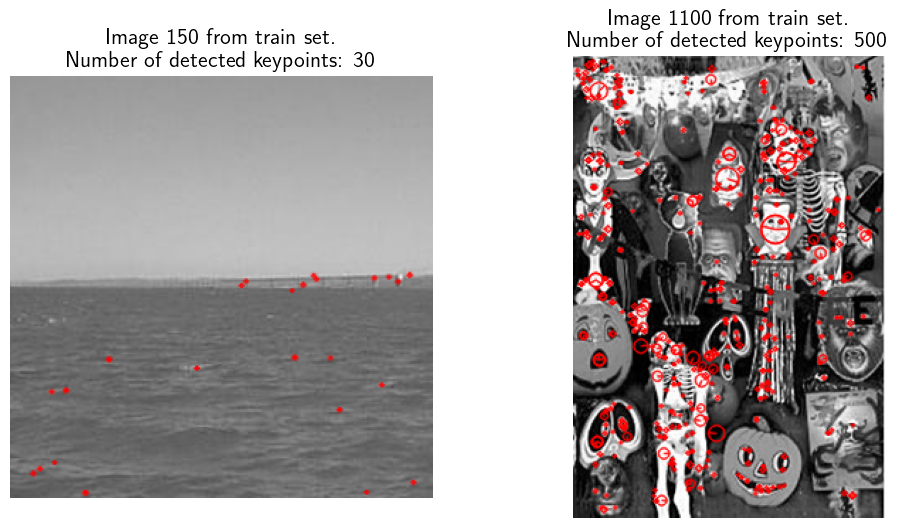

In [ ]:
# Keypoints for 2 sample images
image1 = train_images[150]
image2 = train_images[1100]
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# Draw keypoints on the images
image_keypoints1 = cv2.drawKeypoints(
	image1, 
	keypoints1, 
	outImage = None,
	color = (255, 0, 0),
	flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)
image_keypoints2 = cv2.drawKeypoints(
	image2,
	keypoints2,
	outImage = None,
	color = (255, 0, 0),
	flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image_keypoints1)
ax[0].set_title(f"Image {150} from train set.\nNumber of detected keypoints: {len(keypoints1)}", fontsize=16)
ax[0].axis("off")
ax[1].imshow(image_keypoints2)
ax[1].set_title(f"Image {1100} from train set.\nNumber of detected keypoints: {len(keypoints2)}", fontsize=16)
ax[1].axis("off")

fig.savefig(os.path.join(IMAGE_DIR, "keypoints.pdf"), bbox_inches='tight')
plt.show()

In [14]:
# Silhouette analysis
k_values = np.arange(100, 1001, 50)
silhouette_scores1 = []
silhouette_scores2 = []
for k in tqdm.tqdm(k_values, desc="Computing silhouette scores", leave=False):
	kmeans1 = KMeans(n_clusters=k, random_state=42)
	kmeans2 = KMeans(n_clusters=k, random_state=42)
	cluster_labels1 = kmeans1.fit_predict(sample_descriptors1)
	cluster_labels2 = kmeans2.fit_predict(sample_descriptors2)
	silhouette_scores1.append(silhouette_score(sample_descriptors1, cluster_labels1))
	silhouette_scores2.append(silhouette_score(sample_descriptors2, cluster_labels2))

Computing silhouette scores:   0%|          | 0/19 [00:00<?, ?it/s]

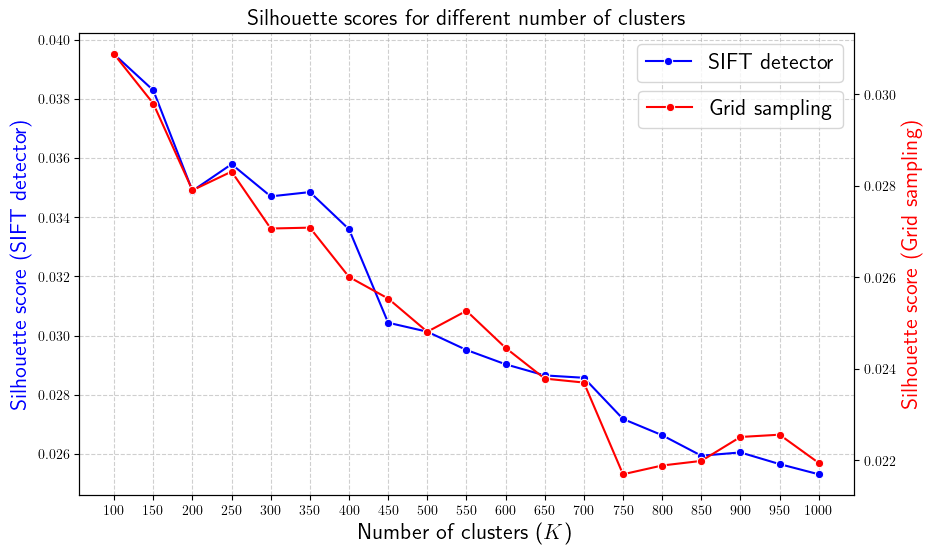

In [15]:
# Plot the silhouette scores
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.lineplot(x=k_values, y=silhouette_scores1, marker="o", color="blue", ax=ax1, label="SIFT detector")

ax2 = ax1.twinx()
sns.lineplot(x=k_values, y=silhouette_scores2, marker="o", color="red", ax=ax2, label="Grid sampling")

ax1.set_title("Silhouette scores for different number of clusters", fontsize=16)
ax1.set_xlabel("Number of clusters" r" ($K$)", fontsize=16)
ax1.set_ylabel("Silhouette score (SIFT detector)", color="blue", fontsize=16)
ax2.set_ylabel("Silhouette score (Grid sampling)", color="red", fontsize=16)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend(loc="upper right", fontsize=16)
ax2.legend(loc="upper right", bbox_to_anchor=(1, 0.9), fontsize=16)
ax1.set_xticks(k_values)

fig.savefig(os.path.join(IMAGE_DIR, "silhouette_scores_comparison.pdf"), bbox_inches='tight')
plt.show() 

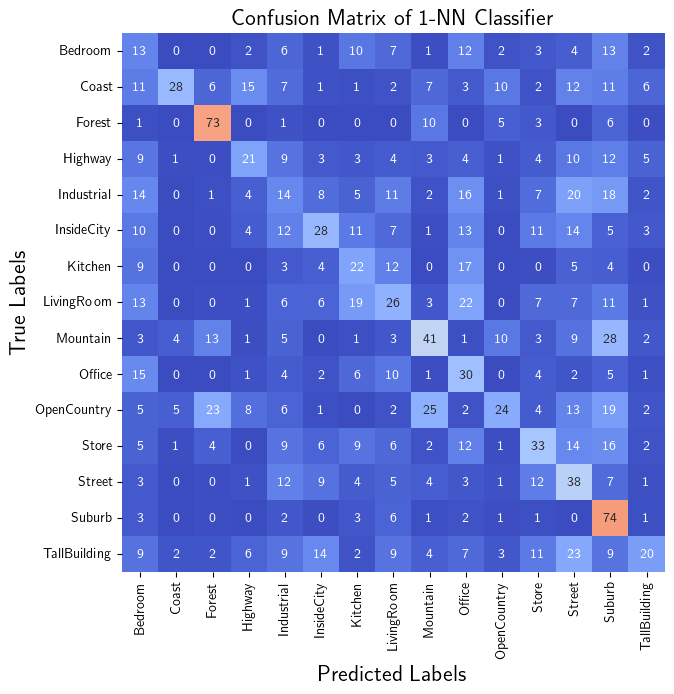

In [ ]:
# KNN confusion matrix
conf_matrix = confusion_matrix(test_labels, one_knn_predictions2)
conf_matrix = conf_matrix / np.sum(conf_matrix, axis=1)

# Plot
fig = plt.figure(figsize=(7, 7))
sns.heatmap(
	conf_matrix * 100,
	annot=True, 
	fmt='.0f', 
	vmin = 0,
	vmax = 100,
	cmap='coolwarm', 
  cbar=False,
	xticklabels=classes, 
	yticklabels=classes
)
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix of 1-NN Classifier', fontsize=16)

fig.savefig(os.path.join(IMAGE_DIR, "1nn_confusion_matrix.pdf"), bbox_inches='tight')
plt.show()

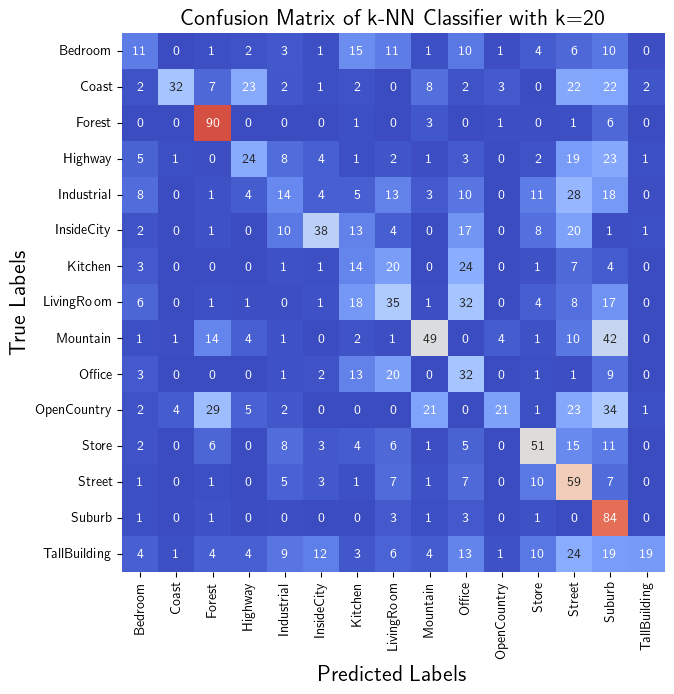

In [ ]:
# KNN confusion matrix
predictions2 = knn2.predict(test_histograms2)
conf_matrix = confusion_matrix(test_labels, predictions2)
conf_matrix = conf_matrix / np.sum(conf_matrix, axis=1)

# Plot
fig = plt.figure(figsize=(7, 7))
sns.heatmap(
	conf_matrix * 100,
	annot=True, 
	fmt='.0f', 
	vmin = 0,
	vmax = 100,
	cmap='coolwarm', 
  cbar=False,
	xticklabels=classes, 
	yticklabels=classes
)
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title(f'Confusion Matrix of k-NN Classifier with k={best_k2}', fontsize=16)

fig.savefig(os.path.join(IMAGE_DIR, "knn_confusion_matrix.pdf"), bbox_inches='tight')
plt.show()


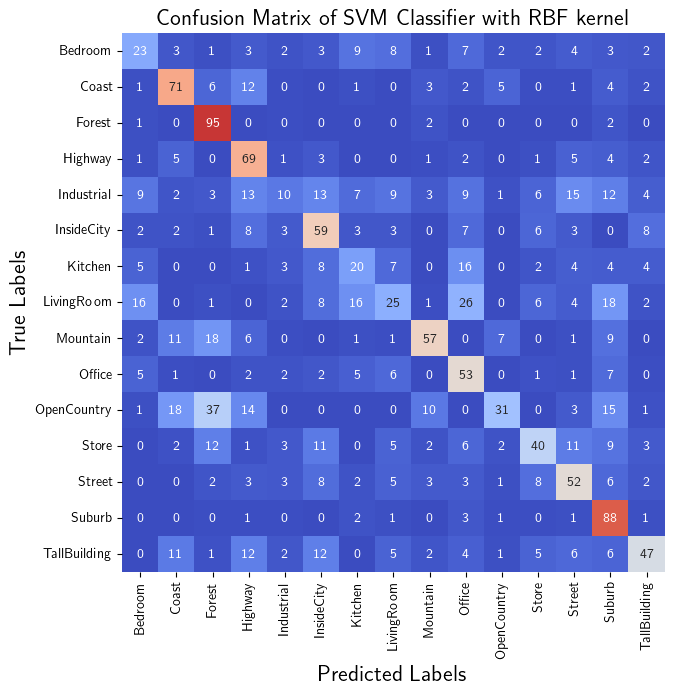

In [ ]:
# SVM RBF confusion matrix
conf_matrix = confusion_matrix(test_labels, rbf_predictions2)
conf_matrix = conf_matrix / np.sum(conf_matrix, axis=1)

# Plot
fig = plt.figure(figsize=(7, 7))
sns.heatmap(
	conf_matrix * 100,
	annot=True, 
	fmt='.0f', 
	vmin = 0,
	vmax = 100,
	cmap='coolwarm', 
  cbar=False,
	xticklabels=classes, 
	yticklabels=classes
)
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title(f'Confusion Matrix of SVM Classifier with RBF kernel', fontsize=16)

fig.savefig(os.path.join(IMAGE_DIR, "svm_rbf_confusion_matrix.pdf"), bbox_inches='tight')
plt.show()

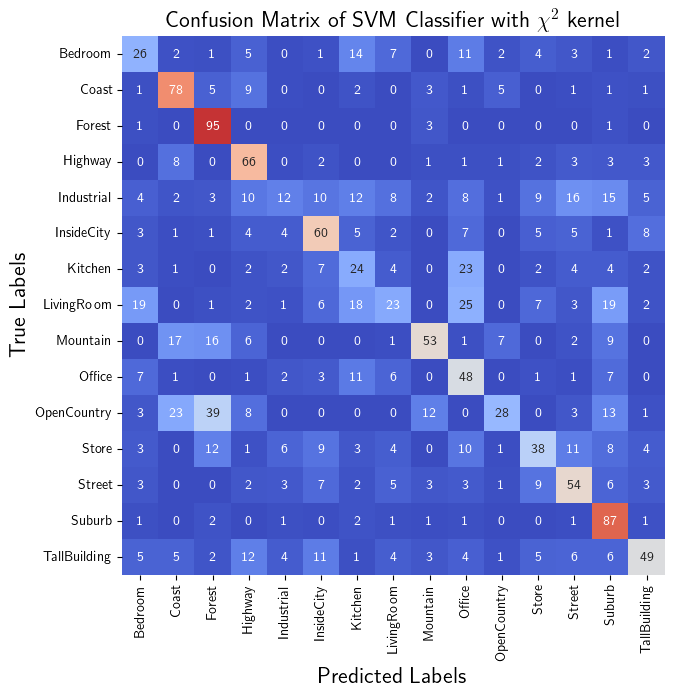

In [ ]:
# SVM chi2 confusion matrix
conf_matrix = confusion_matrix(test_labels, chi_predictions2)
conf_matrix = conf_matrix / np.sum(conf_matrix, axis=1)

# Plot
fig = plt.figure(figsize=(7, 7))
sns.heatmap(
	conf_matrix * 100,
	annot=True, 
	fmt='.0f', 
	vmin = 0,
	vmax = 100,
	cmap='coolwarm', 
  cbar=False,
	xticklabels=classes, 
	yticklabels=classes
)
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title(f'Confusion Matrix of SVM Classifier with ' r'$\chi^2$' ' kernel', fontsize=16)

fig.savefig(os.path.join(IMAGE_DIR, "svm_chi2_confusion_matrix.pdf"), bbox_inches='tight')
plt.show()


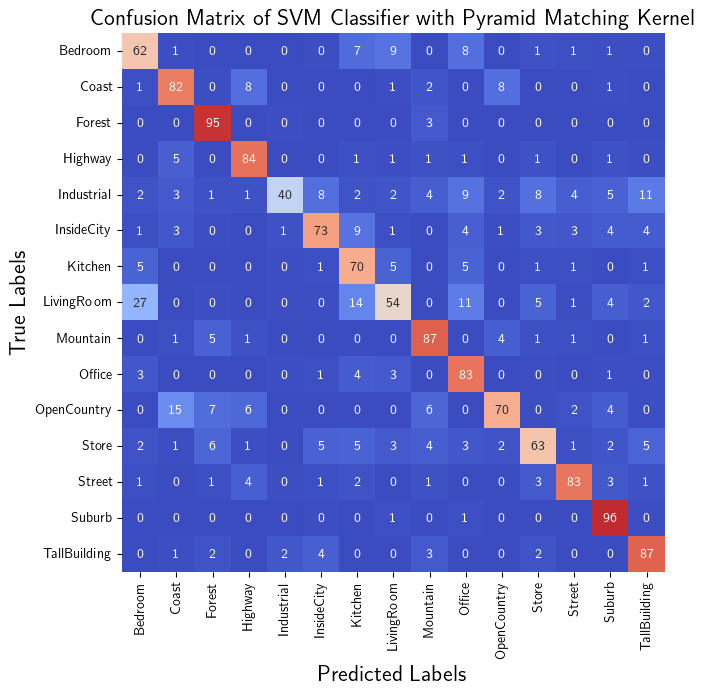

In [ ]:
# SVM PMK confusion matrix
conf_matrix = confusion_matrix(test_labels, pmk_predictions)
conf_matrix = conf_matrix / np.sum(conf_matrix, axis=1)

# Plot
fig = plt.figure(figsize=(7, 7))
sns.heatmap(
	conf_matrix * 100,
	annot=True, 
	fmt='.0f', 
	vmin = 0,
	vmax = 100,
	cmap='coolwarm', 
  cbar=False,
	xticklabels=classes, 
	yticklabels=classes
)
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title(f'Confusion Matrix of SVM Classifier with Pyramid Matching Kernel', fontsize=16)

fig.savefig(os.path.join(IMAGE_DIR, "svm_pmk_confusion_matrix.pdf"), bbox_inches='tight')
plt.show()



In [44]:
import numpy as np
from scipy.stats import norm

# Parameters
mu = 2  # mean
sigma = 2  # standard deviation
x1  = np.array([1, 2, 3])
x2  = np.array([1, 2, 6])
x = np.linalg.norm(x1 - x2)

# Compute the Gaussian value
gaussian_value = norm.pdf(x, 0, sigma)
print(x)
print(gaussian_value)
# # Plot
# plt.figure(figsize=(10, 6))
# plt.plot(x, gaussian_value, label=r'$\mathcal{N}(0, 1)$', color='blue')
# plt.title('Standard Normal Distribution', fontsize=16)
# plt.xlabel('x', fontsize=16)
# plt.ylabel('Density', fontsize=16)
# plt.legend(fontsize=16)
# plt.grid(True, linestyle='--', alpha=0.6)
# plt.show()

3.0
0.06475879783294587


## Experiments

In [71]:
# Number of clusters
K = 400

# Clustering
kmeans1 = KMeans(n_clusters=K, random_state=42)
kmeans1.fit(sample_descriptors1)

kmeans2 = KMeans(n_clusters=K, random_state=42)
kmeans2.fit(sample_descriptors2)

KMeans(n_clusters=400, random_state=42)

In [8]:
import scipy as sp

# Kernel codebook function
def kcb(image_descriptors, centroids, sigma=1):
	"""Compute the kernel codebook representation of a set of images
	
	Parameters
	----------
	images : list
		List of images
	sift : cv2.xfeatures2d_SIFT
		SIFT object
	kmeans : cv2.KMeans
		KMeans object
	k : int
		Number of clusters, i.e. the size of the visual vocabulary
	grid : bool, optional
		Whether to use a grid for dense sampling or not, by default False
	spacing : int, optional
		Spacing step between any two keypints of the grid, by default 8
		Ignored if grid is False
	sigma : float, optional
		Standard deviation of the Gaussian kernel, by default 1
  
	Returns
	-------
	kcb_representation : np.array
		Kernel codebook representation of the images
	"""
 
	kcb_representation = []

	for descriptors in tqdm.tqdm(image_descriptors, desc="Computing KCB kernel codebook", leave=False):
		
		# # Compute descriptors
		# if grid:
		# 	height, width = image.shape[:2]
		# 	keypoints = [
		# 		cv2.KeyPoint(float(x), float(y), float(spacing))
		# 		for y in range(spacing, height, spacing)
		# 		for x in range(spacing, width, spacing)
		# 	]
		# 	_, descriptors = sift.compute(image, keypoints)
		# else:
		# 	_, descriptors = sift.detectAndCompute(image, None)
		# descriptors = np.array(descriptors)
  
		# Compute the kernel codebook for this image
		# gaussian_kernels = np.array([[sp.stats.norm.pdf(np.linalg.norm(word - x), 0, sigma) for x in descriptors] for word in centroids])
		gaussian_kernels = np.array([[(1/np.sqrt(2*np.pi*sigma**2)) * np.exp(- np.linalg.norm(descriptor - word)**2 / (2 * sigma**2)) for descriptor in descriptors] for word in centroids])
		kcb_image = (1/k) * np.sum(gaussian_kernels, axis=1)
  
		kcb_representation.append(kcb_image)

	return np.array(kcb_representation)

In [88]:
# Compute train test descriptors
from sklearn.metrics.pairwise import rbf_kernel

train_descriptors = []
test_descriptors = []
train_kcb = []
test_kcb = []
centroids = kmeans2.cluster_centers_
sigma = 200

for image in tqdm.tqdm(train_images, desc="Computing train descriptors", leave=False):
	
	# Compute descriptors
	height, width = image.shape[:2]
	keypoints = [
		cv2.KeyPoint(float(x), float(y), float(spacing))
		for y in range(spacing, height, spacing)
		for x in range(spacing, width, spacing)
	]
	_, descriptors = sift.compute(image, keypoints)
	descriptors = np.array(descriptors)
	train_descriptors.append(descriptors)
	gaussian_kernel = (1.0 / np.sqrt(2 * np.pi * sigma**2))*rbf_kernel(centroids, descriptors, gamma = 1 / (2*sigma**2))
	kcb_image = (1/K) * np.sum(gaussian_kernel, axis=1)
	train_kcb.append(kcb_image)
 
for image in tqdm.tqdm(test_images, desc="Computing test descriptors", leave=False):
	
	# Compute descriptors
	height, width = image.shape[:2]
	keypoints = [
		cv2.KeyPoint(float(x), float(y), float(spacing))
		for y in range(spacing, height, spacing)
		for x in range(spacing, width, spacing)
	]
	_, descriptors = sift.compute(image, keypoints)
	descriptors = np.array(descriptors)
	test_descriptors.append(descriptors)
	gaussian_kernel = (1.0 / np.sqrt(2 * np.pi * sigma**2))*rbf_kernel(centroids, descriptors, gamma = 1 / (2*sigma**2))
	kcb_image = (1/K) * np.sum(gaussian_kernel, axis=1)
	test_kcb.append(kcb_image)
 
train_kcb = np.array(train_kcb)
test_kcb = np.array(test_kcb)

Computing train descriptors:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing test descriptors:   0%|          | 0/2985 [00:00<?, ?it/s]

In [89]:
# Check if train kcb is all zeros
print(np.all(train_kcb == 0))

False


In [123]:
from sklearn.metrics.pairwise import rbf_kernel

image = train_images[0]
sigma = 200

# Compute descriptors
height, width = image.shape[:2]
spacing = 8
keypoints = [
	cv2.KeyPoint(float(x), float(y), float(spacing))
	for y in range(spacing, height, spacing)
	for x in range(spacing, width, spacing)
]
_, descriptors = sift.compute(image, keypoints)
descriptors = np.array(descriptors)


centroids = kmeans2.cluster_centers_
gaussian_kernel = (1.0 / np.sqrt(2 * np.pi * sigma**2))*rbf_kernel(centroids, descriptors, gamma = 1 /(2*sigma**2))
# kernel_norm = np.sum(gaussian_kernel, axis=0)
distances = np.array([np.linalg.norm(descriptors - word, axis=1) for word in centroids])
mask = np.zeros((len(centroids), len(descriptors)))
for i in range(len(centroids)):
	mask[i, np.argmin(distances[i])] = 1
 
gaussian_kernel = gaussian_kernel * mask
 

# mask = np.zeros((len(Y), len(X)))
# for i in range(len(Y)):
# 	mask[i, np.argmin(distances[i])] = 1

# notmalize the kernel
# norm_ker = gaussian_kernel / kernel_norm


kcb_image = (1/len(descriptors)) * np.sum(gaussian_kernel, axis=1)

print(gaussian_kernel.shape)
print(distances.shape)
print(mask.shape)
# print(gaussian_kernel)

print(kcb_image.shape)
print(kcb_image)

# print(kernel_norm.shape)
# print(kernel_norm)

# print(norm_ker.shape)

# document_words = kmeans2.predict(descriptors)
# histogram = np.bincount(document_words, minlength=K)

# # Normalize the histogram
# histogram = np.array(histogram / len(descriptors))

# print(histogram.shape)
# print(histogram)

(400, 792)
(400, 792)
(400, 792)
(400,)
[8.76970657e-07 8.39334039e-07 9.01715307e-07 8.85233058e-07
 9.09526231e-07 7.22506192e-07 7.82972340e-07 7.86848808e-07
 8.88649083e-07 1.40665765e-06 1.28105022e-06 6.63762168e-07
 1.04612903e-06 7.44895343e-07 6.87216548e-07 1.68314169e-06
 7.93862611e-07 5.98039803e-07 7.37629895e-07 1.68740922e-06
 9.37940095e-07 6.24236300e-07 7.73426283e-07 1.05201667e-06
 1.20754468e-06 1.03301320e-06 8.03561022e-07 1.23090065e-06
 5.48217499e-07 9.64771769e-07 1.14623643e-06 1.24585605e-06
 8.64378179e-07 1.26856630e-06 9.17294675e-07 7.38060573e-07
 9.97020871e-07 1.33237057e-06 1.08357625e-06 8.60378681e-07
 2.16596457e-07 1.09825237e-06 7.40315899e-07 9.51710469e-07
 7.82781769e-07 8.36892330e-07 7.98690613e-07 5.52048254e-07
 1.10035961e-06 1.09863146e-06 1.16764083e-06 1.04777303e-06
 8.85777432e-07 7.54341594e-07 1.41464783e-06 1.03179047e-06
 9.58311527e-07 1.29215627e-06 8.25923200e-07 5.19835275e-07
 7.75727323e-07 1.18108327e-06 8.09665183e-07

: 

In [90]:
# sigma = 200
# for centroid in centroids:
# 	n = np.linalg.norm(descriptors[0] - centroid)
# 	e = np.exp(- n**2 / (2 * sigma**2))
# 	# print(e)
# 	f = (1/np.sqrt(2*np.pi*sigma**2)) * e
# 	print(f)

Computing kernel:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing kernel:   0%|          | 0/2985 [00:00<?, ?it/s]

Training SVMs:   0%|          | 0/15 [00:00<?, ?it/s]

SVM accuracy (KCB): 52.90%


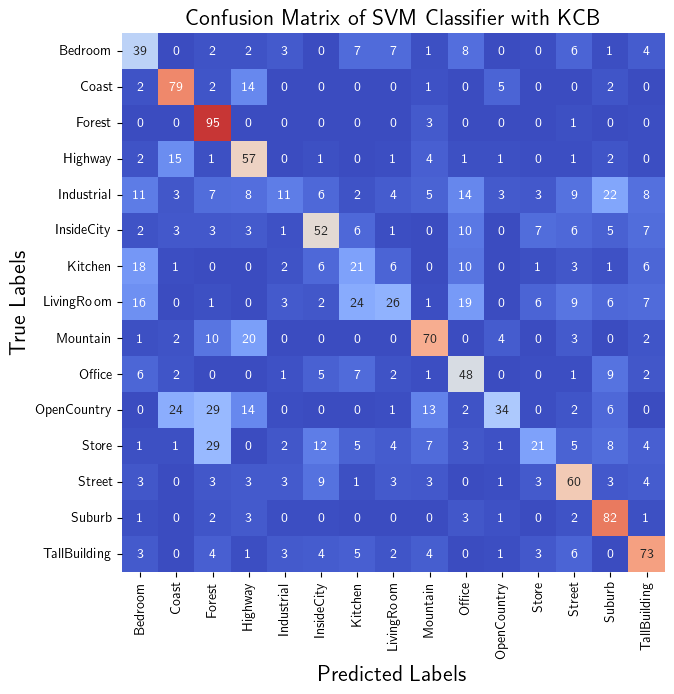

In [93]:
# gram_train = chi2_kernel(train_kcb, train_kcb, gamma=0.5)
# gram_test = chi2_kernel(test_kcb, train_kcb, gamma=0.5)
gram_train = pyramid_kernel(train_kcb, train_kcb)
gram_test = pyramid_kernel(test_kcb, train_kcb)


SVMs = []
for target_label in tqdm.tqdm(set(train_labels), desc="Training SVMs", leave=False):

	# Change labels to {1, -1}
	one_vs_all_labels = [1 if label == target_label else -1 for label in train_labels]
	
	# SVM with RBF kernel
	# svm = SVC(probability=True, C=1.0, kernel='rbf')
	# svm.fit(train_kcb, one_vs_all_labels)
	# SVMs.append(svm)
 
	# SVM with chi2 kernel
	svm = SVC(probability=True, C=1.0, kernel='precomputed')
	svm.fit(gram_train, one_vs_all_labels)
	SVMs.append(svm)
 
# Predictions
# predictions = np.array([svm.decision_function(test_kcb) for svm in SVMs])
predictions = np.array([svm.decision_function(gram_test) for svm in SVMs])
predictions = np.argmax(predictions, axis=0)

# Accuracies
accuracy = accuracy_score(test_labels, predictions)

print(f"SVM accuracy (KCB): {accuracy * 100:.2f}%")

# SVM confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)
conf_matrix = conf_matrix / np.sum(conf_matrix, axis=1)

# Plot
fig = plt.figure(figsize=(7, 7))
sns.heatmap(
	conf_matrix * 100,
	annot=True, 
	fmt='.0f', 
	vmin = 0,
	vmax = 100,
	cmap='coolwarm', 
  cbar=False,
	xticklabels=classes, 
	yticklabels=classes
)
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title(f'Confusion Matrix of SVM Classifier with KCB', fontsize=16)

plt.show()


In [114]:
X = np.array([[0, 0, 0], [1, 1, 1]])
Y = np.array([[1, 0, 0], [1, 1, 0], [1, 1, 1]])
kernel = rbf_kernel(Y,X)
s0 = np.sum(rbf_kernel(Y,X), axis=0)
print(kernel)
print(s0)
norm_kern = kernel / s0
print(norm_kern)

# Create a minimum mask
distances = np.array([np.linalg.norm(X-Y[i], axis=1) for i in range(len(Y))])
print(distances)

mask = np.zeros((len(Y), len(X)))
for i in range(len(Y)):
	mask[i, np.argmin(distances[i])] = 1
 
print(mask)


# Apply mask with element-wise multiplication
masked_kernel = mask * norm_kern
print(masked_kernel)

s = np.sum(masked_kernel, axis=1)
print(s)

[[0.71653131 0.51341712]
 [0.51341712 0.71653131]
 [0.36787944 1.        ]]
[1.59782787 2.22994843]
[[0.44844086 0.23023722]
 [0.32132192 0.32132192]
 [0.23023722 0.44844086]]
[[1.         1.41421356]
 [1.41421356 1.        ]
 [1.73205081 0.        ]]
[[1. 0.]
 [0. 1.]
 [0. 1.]]
[[0.44844086 0.        ]
 [0.         0.32132192]
 [0.         0.44844086]]
[0.44844086 0.32132192 0.44844086]
